# Plotting binding probabilities 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style 
import matplotlib as mpl 

In [2]:
#Set default plotting parameters
mpl.rcParams['figure.figsize'] = [4.0, 4.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=100 

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Probability of binding 

$$P_{bind}(E) = \frac{1}{1+e^{-\beta E}}$$

In [4]:
def p_bind(E):
    
    return 1/(1+np.exp(-E))

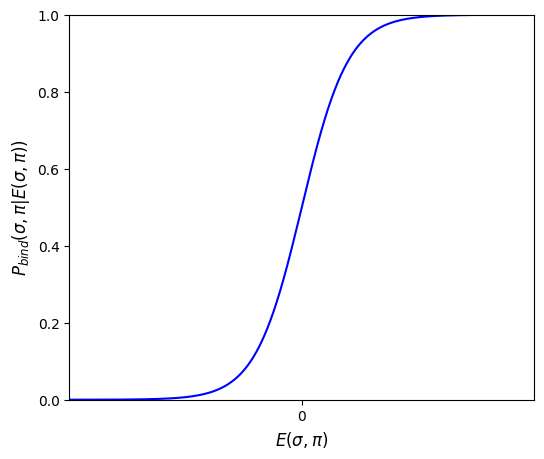

In [5]:
#Compute probability 
Es = np.linspace(-10,10,1000)
probs = p_bind(Es)

fig, ax = plt.subplots(figsize=(6,5))

ax.plot(Es,probs, c ='blue')
ax.set_xlabel("$E(\sigma,\pi)$")
ax.set_ylabel("$P_{bind}(\sigma,\pi | E(\sigma,\pi))$")
ax.set_xticks([0],["0"])
ax.set_ylim([0,1])
ax.set_xlim([-10,10])
plt.savefig('p_bind.png', dpi=500);

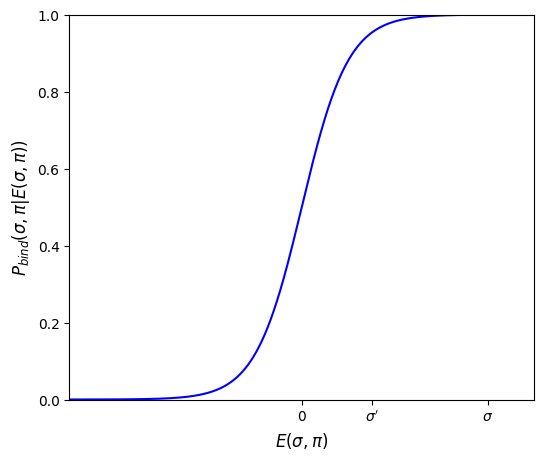

In [6]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(Es,probs, c ='blue')
ax.set_xlabel("$E(\sigma,\pi)$")
ax.set_ylabel("$P_{bind}(\sigma,\pi | E(\sigma,\pi))$")
ax.set_xticks([0,8,3],["0","$\sigma$","$\sigma^\prime$"])
ax.set_ylim([0,1])
ax.set_xlim([-10,10])
plt.savefig('p_bind_change.png', dpi=500);

## Probability of shared specificty

$$\left< p_s | \Delta E \right> = \frac{1+e^{-\beta E^*}}{1+e^{-\beta(E^* - \Delta E)}}$$

In [7]:
def p_s(delta_E, E_star):
            
    return (1+np.exp(-E_star))/(1+np.exp((delta_E - E_star)))

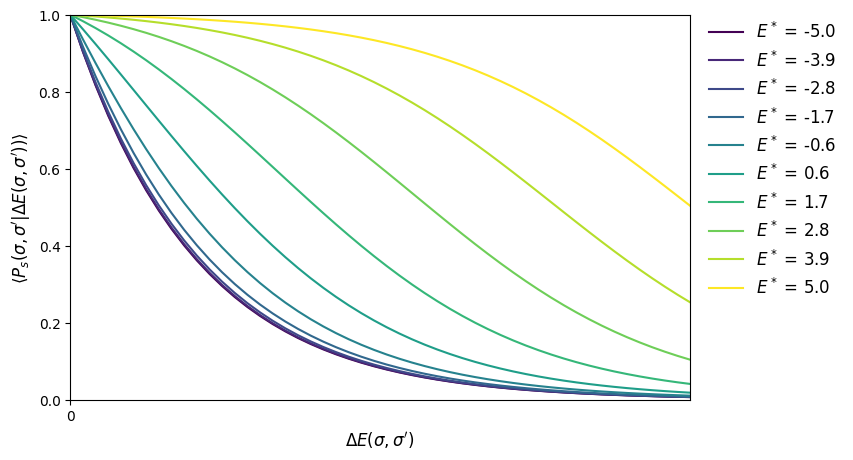

In [8]:
fig,ax = plt.subplots(figsize=(8,5))

delta_Es = np.linspace(0,5,50)
means = np.linspace(-5,5,10)

colors = plt.cm.viridis(np.linspace(0,1, len(means)))
for i, mean in enumerate(means):
    ax.plot(delta_Es, p_s(delta_Es, mean), label = f"$E^*$ = {means[i]:.1f}", color=colors[i])

ax.set_xlabel(r"$\Delta E(\sigma,\sigma^\prime)$")
ax.set_ylabel(r"$\left<P_s(\sigma,\sigma^\prime | \Delta E(\sigma,\sigma^\prime))\right>$")
#ax.axvline(0, c = 'black')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlim([0,5])
ax.set_ylim([0,1])
ax.set_xticks([0])
plt.savefig('p_s.png', dpi=500,bbox_inches='tight');